In [1]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
from matplotlib import rc
import platform
import pandas as pd
import matplotlib.pyplot as plt

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

In [2]:
# 선그래프
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
df

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [3]:
df = df.fillna(method = 'ffill')
df.head()
# 전출지가 '서울특별시'에서 다른 도시로 이전한 인구수의 분포를 분석하고자함
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] !='서울특별시')
df_seoul = df[mask]

#전출지별의 값은 모두 '서울특별시'이므로 칼럼삭제
df_seoul = df_seoul.drop('전출지별', axis=1)
# 전입지별 칼럼명을 '전입지'로 변경
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)

# 전입지 칼럼을 인덱스로 변경
df_seoul.set_index('전입지', inplace=True)


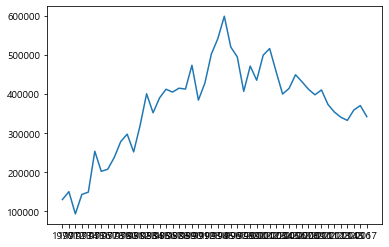

In [4]:
# df.seoul 에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도', : ]
sr_one

# 기본 선그래프로 그리기
plt.plot(sr_one)


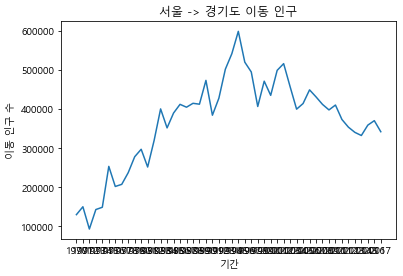

In [5]:
# df_seoul 에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도', :]
sr_one

# 기본 선 그래프로 그리기
plt.plot(sr_one)

# plt.plot(sr_one.index, sr_one.values)
# 그래프에 제목 추가, 축 이름 추가
# 서울 -> 경기도 이동 인구
# x축 이름 -> '기간', y축 이름 -> '이동 인구 수'
plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
           
plt.show()

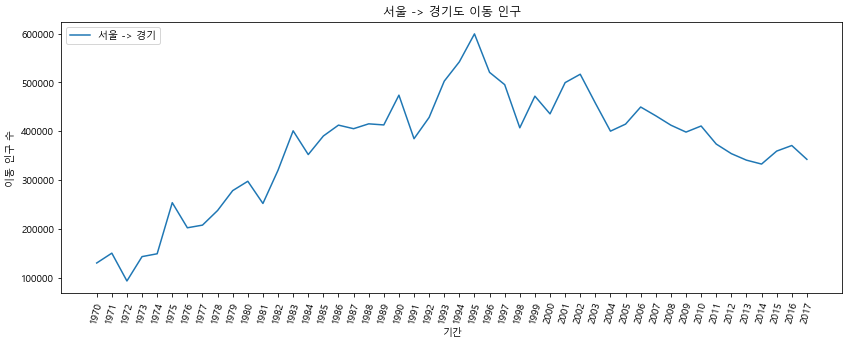

In [6]:
plt.figure(figsize = (14,5))
# plt.style.use('dark_background')    # 배경 검은색으로

# x축 눈금 라벨 회전 : plt.xticks(rotation = 'verticla')
plt.xticks(rotation = 'verticla')
plt.xticks(rotation = 75)     # 숫자는 회전 각도를 의미
plt.plot(sr_one)

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.legend(labels = ['서울 -> 경기'], loc = 'upper left')
plt.show()

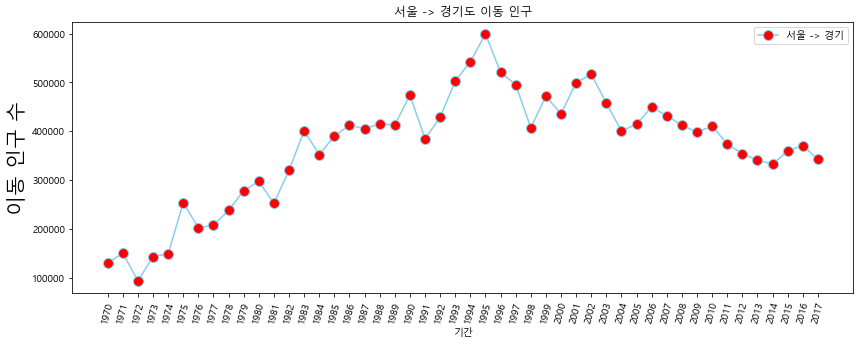

In [7]:
plt.figure(figsize = (14,5))
plt.xticks(size = 10, rotation = 75)
# plt.style.use('dark_background')    # 배경 검은색으로

plt.plot(sr_one, marker = 'o', markersize = 10, color = 'skyblue', mfc = 'red')

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size = 20)
plt.legend(labels = ['서울 -> 경기'], loc = 'best')
plt.show()

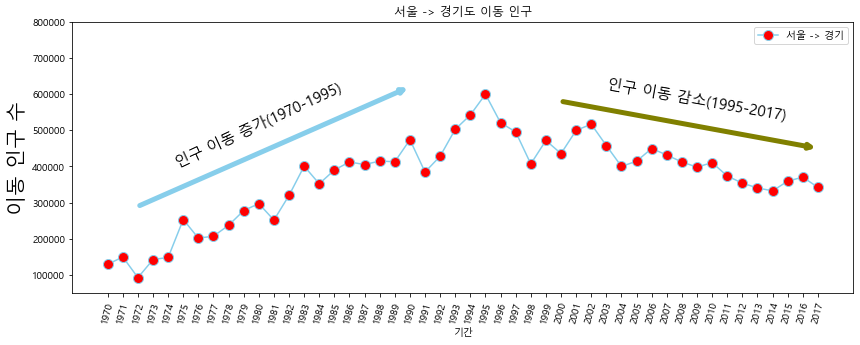

In [8]:
plt.figure(figsize = (14,5))
plt.xticks(size = 10, rotation = 75)
# plt.style.use('dark_background')    # 배경 검은색으로

plt.plot(sr_one, marker = 'o', markersize = 10, color = 'skyblue', mfc = 'red')

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size = 20)
plt.legend(labels = ['서울 -> 경기'], loc = 'best')

# 설명(주석) 추가
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000,800000)

# 주석 표시 : 화살표 정의
plt.annotate('',
             xy = (20,620000),        # 화살표의 머리 부분(끝점)
             xytext = (2,290000),    # 화살표의 꼬리 부분(시작점)
            arrowprops = dict(arrowstyle='->', color='skyblue', lw = 5)
            )     

plt.annotate('',
             xy = (47,450000),        # 화살표의 머리 부분(끝점)
             xytext = (30,580000),    # 화살표의 꼬리 부분(시작점)
            arrowprops = dict(arrowstyle='->', color='olive', lw = 5)
            )     
# 주석 표시 : 문장
plt.annotate("인구 이동 증가(1970-1995)",
             xy = (10,400000),
             rotation = 25,
             va = 'baseline',
             ha = 'center',
             fontsize = 15
            )

plt.annotate("인구 이동 감소(1995-2017)",
             xy = (39,530000),
             rotation = -10,
             va = 'baseline',
             ha = 'center',
             fontsize = 15
            )

plt.show()

C:\Users\HPE\AppData\Local\Temp\ipykernel_5564\712576946.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 90)
C:\Users\HPE\AppData\Local\Temp\ipykernel_5564\712576946.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


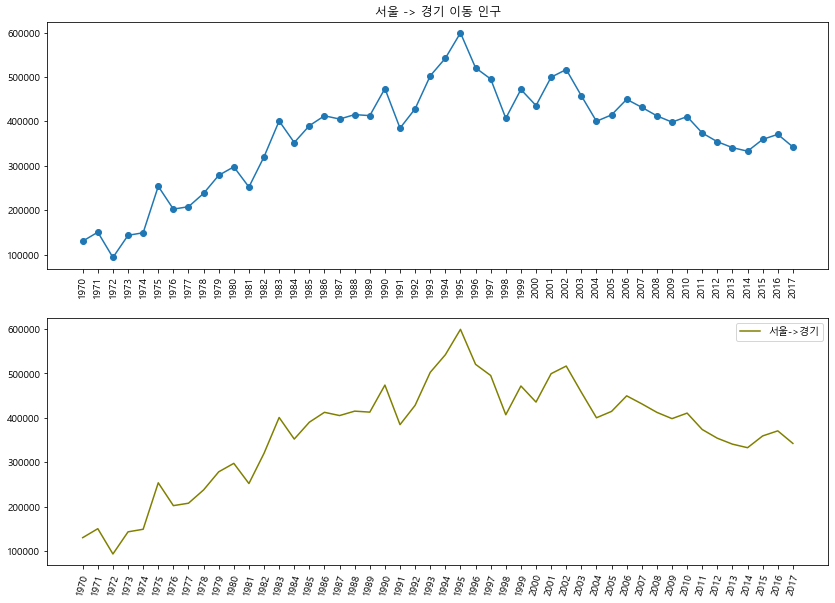

In [9]:
# 한 화면에 두개의 그래프 그리기 : add_subplot()
fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(2,1,1)      # 한 행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2,1,2) 

# axe 객체에 plot함수로 그래프 그리기
ax1.plot(sr_one, marker = 'o')
ax2.plot(sr_one, color = 'olive', label = '서울->경기')

ax1.set_title('서울 -> 경기 이동 인구')
ax1.set_xticklabels(sr_one.index, rotation = 90)

ax2.legend(loc = 'best')
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show()


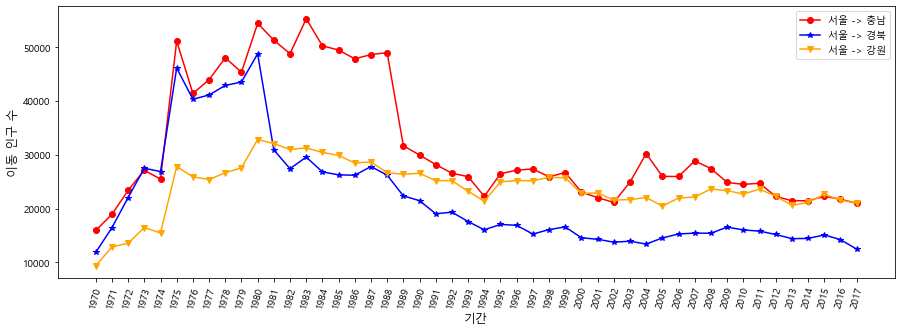

In [10]:
col_years = list(map( str, range(1970, 2018)))  # 년도를 1970~2017

sr_two = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

# ax 에 그래프 추가
ax.plot(col_years, sr_two.loc['충청남도', :], color = 'red',
        marker = 'o', label = '서울 -> 충남')
ax.plot(col_years, sr_two.loc['경상북도', :], color = 'blue',
        marker = '*', label = '서울 -> 경북')
ax.plot(col_years, sr_two.loc['강원도', :], color = 'orange',
        marker = 'v', label = '서울 -> 강원')

ax.legend(loc = 'best')

# x label 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구 수', size = 12)
plt.xticks(rotation = 'verticla')
plt.xticks(rotation = 75)

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

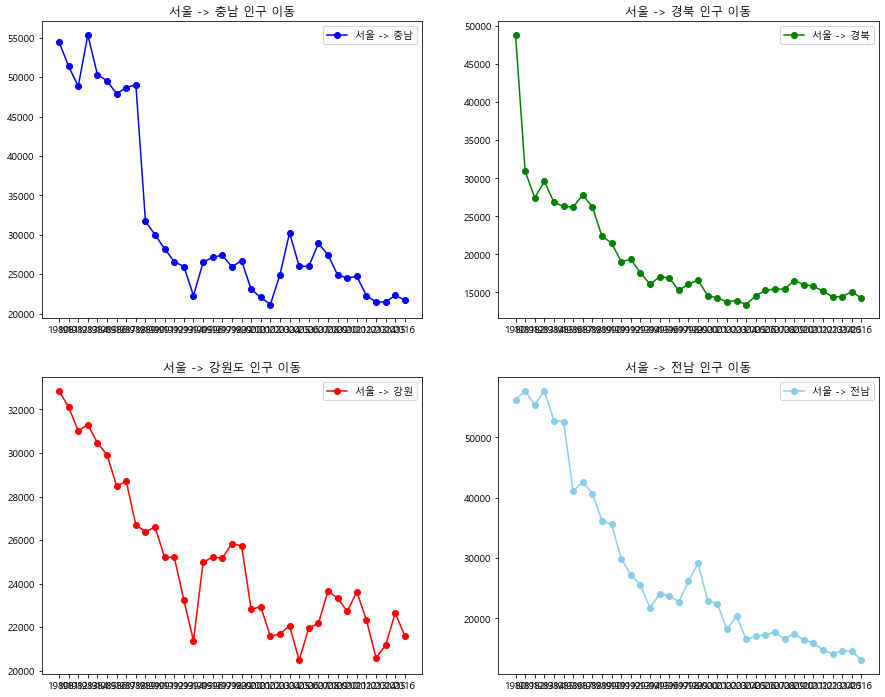

In [11]:
# df2 -> 충청남도, 경상북도, 강원도, 전라남도의 자료를 가져옴
# 1980년도에서 2016년까지의 자료만
col_years = list(map( str, range(1980, 2017)))  # 년도를 1980~2016

df2 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 그래프 : 각 도시를 하나의 그래프에, 한페이지 4개의 그래프로
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(2,2,1)   # 충남
ax2 = fig.add_subplot(2,2,2)   # 경북
ax3 = fig.add_subplot(2,2,3)   # 강원
ax4 = fig.add_subplot(2,2,4)   # 전남

ax1.plot(col_years, df2.loc['충청남도', :], marker = 'o', color = 'blue',
         label = '서울 -> 충남')
ax2.plot(col_years, df2.loc['경상북도', :], marker = 'o', color = 'green',
         label = '서울 -> 경북')
ax3.plot(col_years, df2.loc['강원도', :], marker = 'o', color = 'red',
         label = '서울 -> 강원')
ax4.plot(col_years, df2.loc['전라남도', :], marker = 'o', color = 'skyblue',
         label = '서울 -> 전남')


# 범례 표시
ax1.legend(); ax2.legend(); ax3.legend(); ax4.legend()

# 각 그래프의 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=12)
ax2.set_title('서울 -> 경북 인구 이동', size=12)
ax3.set_title('서울 -> 강원도 인구 이동', size=12)
ax4.set_title('서울 -> 전남 인구 이동', size=12)

# 각 그래프의 xticks 지정
ax1.set_xticks(ticks = col_years, roation = 75)
ax2.set_xticks(ticks = col_years, roation = 75)
ax3.set_xticks(ticks = col_years, roation = 75)
ax4.set_xticks(ticks = col_years, roation = 75)

plt.show

In [12]:
# 시도별 전출입 인구수.xlsx 파일을 읽어 df에 저장한 후
# None 데이터 처리
# 서울 특별시에서 타시로 이동한 인구의 자료만 df_seoul로 가져옴
# index를 전입지 칼럼으로 설정
# 경상북도, 충청남도, 강원도, 전라남도의 자료중 1997년부터 2017년 자료만 추출
# df1에 저장
# 년도를 인덱스로 바꾸어서 df_t에 저장

df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')
df = df.fillna(method = 'ffill')
df_seoul = df[(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')]

df_seoul = df_seoul.drop('전출지별', axis=1)
df_seoul.rename(columns = {'전입지별':'전입지'}, inplace = True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [13]:
col_years = list(map(str,range(1997, 2018)))

df1 = df_seoul.loc[['경상북도', '충청남도', '강원도', '전라남도'], col_years]
df1_t = df1.T
df1_t

전입지,경상북도,충청남도,강원도,전라남도
1997,15271,27395,25178,22773
1998,16103,25928,25840,26176
1999,16604,26726,25741,29161
2000,14576,23083,22832,22969
2001,14303,22056,22941,22457
2002,13762,21155,21582,18179
2003,13938,24942,21696,20432
2004,13414,30246,22071,16529
2005,14550,26012,20483,17049
2006,15285,25986,21969,17329


<AxesSubplot:title={'center':'서울 -> 타시도 인구 이동'}, xlabel='기간', ylabel='이동 인구 수'>

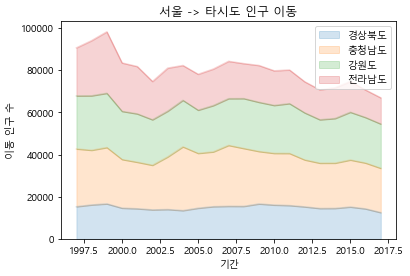

In [14]:
# 면적 그래프 : 인덱스가 숫자여야함
df1_t.index = df1_t.index.map(int)
df1_t.index

ax = df1_t.plot(kind = 'area', stacked = True, alpha = 0.2)
ax.set_title('서울 -> 타시도 인구 이동', size = 12)
ax.set_ylabel('이동 인구 수')
ax.set_xlabel('기간')
ax.legend(loc = 'best')
ax

In [15]:
# # 그래프 사용법 1
# fig = plt.figure() # fig 객체로 지정
# ax = fig.add_subplot(1,1,1)
# ax.set_title()

# # 그래프 사용법 2
# plt.plot()
# plt.title()

# # 그래프 사용법 3 
# df.plot()

# # 그래프 사용법 4
# ax = df.plot()
# ax.set_title()

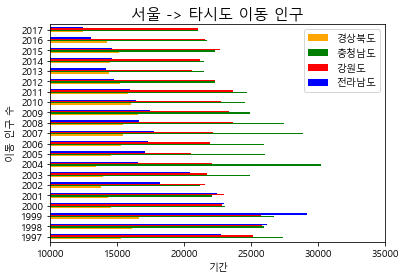

In [16]:
# 막대 그래프
df1_t.index = df1_t.index.map(int)
df1_t.plot(kind='barh', color=['orange','green','red','blue']) # bar:세로, barh:가로
plt.title('서울 -> 타시도 이동 인구', size = 15)
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.xlim(10000, 35000)
plt.legend(loc='best')
plt.show()

In [17]:
df2 = df_seoul.loc[['경상북도', '충청남도', '강원도', '전라남도'], col_years]

# 합계 칼럼을 추가(1997년~2017년 까지의 인구 이동수의 합계)
df2['합계'] = df2.sum(axis=1)
df2

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,,,,,,,,,,,,,
경상북도,15271,16103,16604,14576,14303,13762,13938,13414,14550,15285,...,16569,16042,15818,15191,14420,14456,15113,14236,12464,312988.0
충청남도,27395,25928,26726,23083,22056,21155,24942,30246,26012,25986,...,24889,24522,24723,22269,21486,21473,22299,21741,21020,514307.0
강원도,25178,25840,25741,22832,22941,21582,21696,22071,20483,21969,...,23331,22736,23624,22332,20601,21173,22659,21590,21016,475240.0
전라남도,22773,26176,29161,22969,22457,18179,20432,16529,17049,17329,...,17468,16429,15974,14765,14187,14591,14598,13065,12426,380875.0


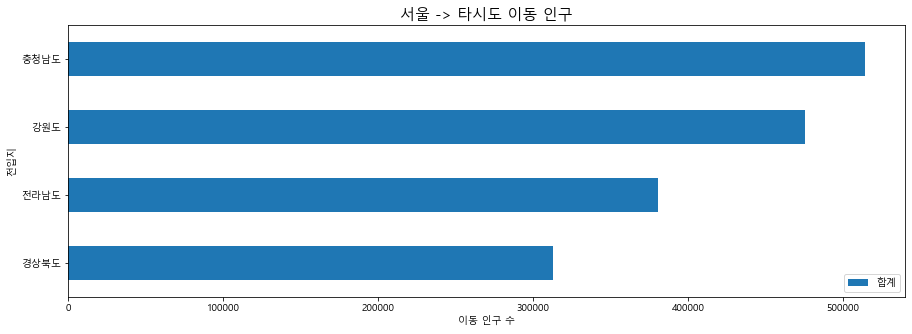

In [24]:
df_total = df2[['합계']].sort_values(by = '합계', ascending = True)
df_total

df_total.plot(kind = 'barh', figsize = (15,5))
plt.title('서울 -> 타시도 이동 인구', size = 15)
plt.xlabel('이동 인구 수')
plt.ylabel('전입지')
plt.xlim(200000, 550000)
plt.legend(loc='best')

In [19]:
# twin 그래프 : x축은 동일 y축의 범위가 서로 다른 그래프 그리기
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
# 북한의 수력, 화력 발전량의 추이를 분석
df = df.loc[5:9]
df = df.drop('전력량 (억㎾h)', axis = 1)
df = df.set_index('발전 전력별')
df_t = df.T
df_t

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [20]:
# 합계 -> 총 발전량
df_t = df_t.rename(columns={'합계':'총 발전량'})

# 증감율 : (총 발전량 / 전년도 총 발전량 - 1) * 100
# ['총 발전량 - 1년']
df_t['총 발전량']
df_t['전년도 발전량'] = df_t['총 발전량'].shift(1)

df_t['증감율'] = (df_t['총 발전량']/df_t['전년도 발전량']-1) * 100
df_t

발전 전력별,총 발전량,수력,화력,원자력,전년도 발전량,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


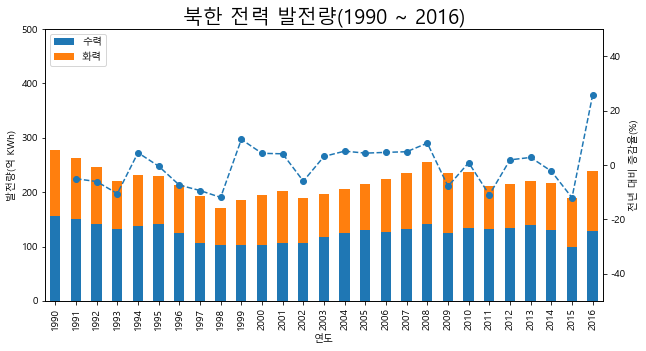

In [21]:
# 2개축 그래프 그리기 : 수력 화력 -> 막대 그래프, 증감율 -> 선 그래프

ax1 = df_t[['수력', '화력']].plot(kind = 'bar', stacked = True, figsize = (10,5))
ax2 = ax1.twinx()
ax2.plot(df_t.index, df_t['증감율'], ls = '--',
         marker = 'o', label = '전년대비 증감율(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도')
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel("전년 대비 증감율(%)")

plt.title('북한 전력 발전량(1990 ~ 2016)', size = 20)
ax1.legend(loc = 'upper left')
plt.show()

In [38]:
# 한국의 수력 화력 원자력 의 년도별 데이터 전력량을 구하고
# 위 그래프에 stacked
df_k = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df_k = df_k.loc[0:3]
df_k = df_k.drop("전력량 (억㎾h)", axis = 1)
df_k = df_k.set_index("발전 전력별")
df_k = df_k.T
df_k

발전 전력별,합계,수력,화력,원자력
1990,1077,64,484,529
1991,1186,51,573,563
1992,1310,49,696,565
1993,1444,60,803,581
1994,1650,41,1022,587
1995,1847,55,1122,670
1996,2055,52,1264,739
1997,2244,54,1420,771
1998,2153,61,1195,897
1999,2393,61,1302,1031


In [50]:
df_k["전년도 발전량"] = df_k["합계"].shift(1)
df_k["증감율"] = (df_k["합계"] / df_k["전년도 발전량"] - 1) * 100
df_k

발전 전력별,합계,수력,화력,원자력,전년도 발전량,증감율
1990,1077,64,484,529,NaN,NaN
1991,1186,51,573,563,1077,10.120706
1992,1310,49,696,565,1186,10.455312
1993,1444,60,803,581,1310,10.229008
1994,1650,41,1022,587,1444,14.265928
1995,1847,55,1122,670,1650,11.939394
1996,2055,52,1264,739,1847,11.261505
1997,2244,54,1420,771,2055,9.19708
1998,2153,61,1195,897,2244,-4.055258
1999,2393,61,1302,1031,2153,11.147236


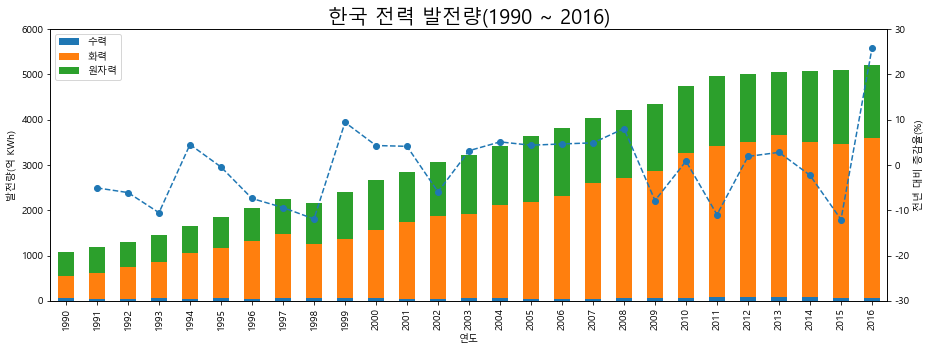

In [65]:
ax_k1 = df_k[["수력", "화력", "원자력"]].plot(kind = 'bar',
                                       stacked = True, figsize = (15,5))
ax_k2 = ax_k1.twinx()

ax_k2.plot(df_k.index, df_t['증감율'], ls = '--',
         marker = 'o', label = '전년대비 증감율(%)')
ax_k1.set_ylim(0,6000)
ax_k2.set_ylim(-30,30)

ax_k1.set_xlabel('연도')
ax_k1.set_ylabel('발전량(억 KWh)')
ax_k2.set_ylabel("전년 대비 증감율(%)")

plt.title('한국 전력 발전량(1990 ~ 2016)', size = 20)
ax_k1.legend(loc = 'upper left')
plt.show()
